In [1]:
import pandas as pd


# Data pemain
data_pemain = {
    'tinggi_badan' : [168, 180, 173, 161, 175, 165, 180, 168, 158],
    'usia' : [25, 28, 22, 30, 30, 27, 32, 35, 24],
    'tim' : [
        'A', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'B'
    ]
}

data_pemain_df = pd.DataFrame(data_pemain)
data_pemain_df

,tinggi_badan,usia,tim
0,168,25,A
1,180,28,B
2,173,22,A
3,161,30,A
4,175,30,B
5,165,27,A
6,180,32,A
7,168,35,A
8,158,24,B


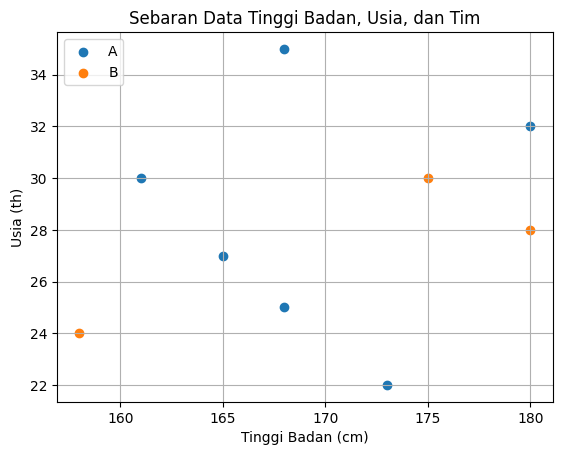

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for tim, d in data_pemain_df.groupby('tim'):
    ax.scatter(d['tinggi_badan'], d['usia'], label=tim)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Usia, dan Tim')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Usia (th)')
plt.grid(True)
plt.show()

In [3]:
import numpy as np

X_train = np.array(data_pemain_df[['tinggi_badan', 'usia']])
y_train = np.array(data_pemain_df['tim'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[168  25]
 [180  28]
 [173  22]
 [161  30]
 [175  30]
 [165  27]
 [180  32]
 [168  35]
 [158  24]]

y_train: ['A' 'B' 'A' 'A' 'B' 'A' 'A' 'A' 'B']


In [4]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]


In [5]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 1 0 0 1 0 0 0 1]


In [6]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
tinggi_badan = 180
usia = 22
X_new = np.array([tinggi_badan, usia]).reshape(1, -1)
X_new

array([[180,  22]])

In [9]:
y_new = model.predict(X_new)

In [10]:
lb.inverse_transform(y_new)

array(['B'], dtype='<U1')

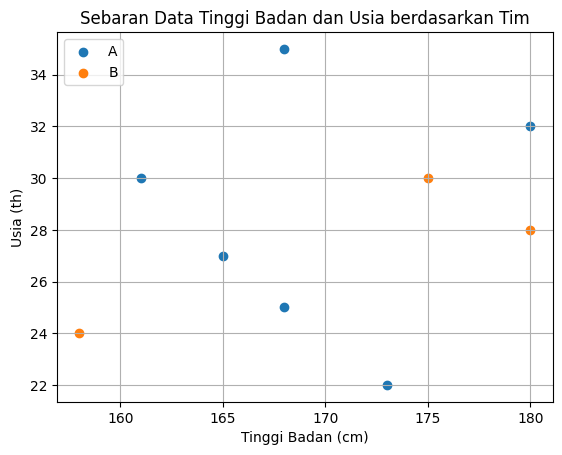

In [11]:
data_pemain = {
    'tinggi_badan' : [168, 180, 173, 161, 175, 165, 180, 168, 158],
    'usia' : [25, 28, 22, 30, 30, 27, 32, 35, 24],
    'tim' : [
        'A', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'B'
    ]
}

data_pemain_df = pd.DataFrame(data_pemain)

fig, ax = plt.subplots()
for tim, d in data_pemain_df.groupby('tim'):
    ax.scatter(d['tinggi_badan'], d['usia'], label=tim)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan dan Usia berdasarkan Tim')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Usia (th)')
plt.grid(True)
plt.show()

In [13]:
tinggi_badan = 180
usia = 22
Tim = np.array([tinggi_badan, usia])
Tim

array([180,  22])

In [17]:
X_train

array([[168,  25],
       [180,  28],
       [173,  22],
       [161,  30],
       [175,  30],
       [165,  27],
       [180,  32],
       [168,  35],
       [158,  24]])

In [18]:
tinggi_badan = 180
usia = 22
konghucu = np.array([tinggi_badan, usia])

In [19]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(konghucu, d) for d in X_train]
print(data_jarak)


[12.36931687685298, 6.0, 7.0, 20.615528128088304, 9.433981132056603, 15.811388300841896, 10.0, 17.69180601295413, 22.090722034374522]


In [21]:
data_pemain_df['jarak'] = data_jarak
data_pemain_df_sorted = data_pemain_df.sort_values(by='jarak')
print(data_pemain_df_sorted)

   tinggi_badan  usia tim      jarak
1           180    28   B   6.000000
2           173    22   A   7.000000
4           175    30   B   9.433981
6           180    32   A  10.000000
0           168    25   A  12.369317
5           165    27   A  15.811388
7           168    35   A  17.691806
3           161    30   A  20.615528
8           158    24   B  22.090722


In [22]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['kristen', 'islam', 'islam', 'kristen'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}\n')

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 0 0]



In [23]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0])

In [25]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 1.0


In [26]:
from sklearn.metrics import precision_score
prec = precision_score(y_test, y_pred)
print(f'Precission: {prec}')

Precission: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn.metrics import recall_score
rec = recall_score(y_test, y_pred)
print(f'Recall: {rec}')

Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')

F1-score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [29]:
from sklearn.metrics import classification_report
cls_report = classification_report(y_test, y_pred)
print(f'Classfication Report:\n{cls_report}')

Classfication Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [30]:
from sklearn.metrics import precision_score
prec = precision_score(y_test, y_pred)
print(f'Precission: {prec}')

Precission: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc}')

MCC: 0.0
